In [ ]:
## Importing Libraries/Dependencies

!pip install openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visual Preference

sns.set(style="whitegrid")
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
file_path = 'all_jobs.xlsx'

df = pd.read_excel(file_path)

df. head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,site,job_url,job_url_direct,title,company,location,...,company_addresses,company_num_employees,company_revenue,company_description,logo_photo_url,banner_photo_url,ceo_name,ceo_photo_url,mean_salary,cleaned_description
0,0,0,0,487e95701c0d55b3,indeed,https://www.indeed.com/viewjob?jk=487e95701c0d...,https://jobs.gusto.com/postings/riscpoint-advi...,Cybersecurity Operations Senior Consultant,RISCPoint,"Remote, US",...,"2814 Detroit Ave \nCleveland, Ohio 44113, US",11 to 50,NaN,RISCPoint Advisory Group is an industry leader...,NaN,https://d2q79iu7y748jz.cloudfront.net/s/_heade...,NaN,NaN,120000.0,riscpoint is seeking a conceptual thinker with...
1,1,1,1,679ff0528b73610f,indeed,https://www.indeed.com/viewjob?jk=679ff0528b73...,https://www.marketaxess.com/careers/current-op...,Senior Information Security Engineer (GRC),MarketAxess Holdings,"New York, NY, US",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175000.0,company description marketaxess is on a journe...
2,2,2,2,41f6f886cd9b9d1d,indeed,https://www.indeed.com/viewjob?jk=41f6f886cd9b...,https://workforcenow.adp.com/mascsr/default/md...,Information System Security Officer II,Global Resource Solutions,"Colorado Springs, CO, US",...,Fairfax,51 to 200,$5M to $25M (USD),NaN,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,NaN,NaN,NaN,95880.5,"global resource solutions, inc. (grs) is seeki..."
3,3,3,3,f82f829d7cf62384,indeed,https://www.indeed.com/viewjob?jk=f82f829d7cf6...,https://workforcenow.adp.com/mascsr/default/md...,Cyber Operations Support Specialist,"Cole Engineering Services, Inc","Fort Meade, MD, US",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117500.0,**company overview:** by light professional it...
4,4,4,4,895d9f28e9e5ee10,indeed,https://www.indeed.com/viewjob?jk=895d9f28e9e5...,https://mufgub.wd3.myworkdayjobs.com/MUFG-Care...,"Identity & Access Management, Analyst",MUFG,"Tampa, FL, US",...,Tokyo,"10,000+",more than $10B (USD),MUFG (Mitsubishi UFJ Financial Group) is the s...,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,https://d2q79iu7y748jz.cloudfront.net/s/_heade...,Kevin Cronin,https://d2q79iu7y748jz.cloudfront.net/s/_ceoph...,96000.0,**do you want your voice heard and your action...


### Dataset Overview
Below is a summary of the raw dataset, including the number of entries, data types, and null values. 

In [5]:
# Checking shape, column names, & general structure

print("Shape of dataset:", df.shape)
print("\nColumn name:\n", df.columns.tolist())
print("\nDataset Info:\n:")
df.info()

Shape of dataset: (94529, 36)

Column name:
 ['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'site', 'job_url', 'job_url_direct', 'title', 'company', 'location', 'job_type', 'date_posted', 'salary_source', 'interval', 'min_amount', 'max_amount', 'currency', 'is_remote', 'job_level', 'job_function', 'company_industry', 'listing_type', 'emails', 'description', 'company_url', 'company_url_direct', 'company_addresses', 'company_num_employees', 'company_revenue', 'company_description', 'logo_photo_url', 'banner_photo_url', 'ceo_name', 'ceo_photo_url', 'mean_salary', 'cleaned_description']

Dataset Info:
:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94529 entries, 0 to 94528
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0.2           94529 non-null  int64         
 1   Unnamed: 0.1           94529 non-null  int64         
 2   Unnamed: 0             94529 non-null

In [6]:
# Cleaning

df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], inplace=True)

print("Updated shape:", df.shape)
df.head()

Updated shape: (94529, 33)


,id,site,job_url,job_url_direct,title,company,location,job_type,date_posted,salary_source,...,company_addresses,company_num_employees,company_revenue,company_description,logo_photo_url,banner_photo_url,ceo_name,ceo_photo_url,mean_salary,cleaned_description
0,487e95701c0d55b3,indeed,https://www.indeed.com/viewjob?jk=487e95701c0d...,https://jobs.gusto.com/postings/riscpoint-advi...,Cybersecurity Operations Senior Consultant,RISCPoint,"Remote, US",fulltime,2024-10-10,direct_data,...,"2814 Detroit Ave \nCleveland, Ohio 44113, US",11 to 50,NaN,RISCPoint Advisory Group is an industry leader...,NaN,https://d2q79iu7y748jz.cloudfront.net/s/_heade...,NaN,NaN,120000.0,riscpoint is seeking a conceptual thinker with...
1,679ff0528b73610f,indeed,https://www.indeed.com/viewjob?jk=679ff0528b73...,https://www.marketaxess.com/careers/current-op...,Senior Information Security Engineer (GRC),MarketAxess Holdings,"New York, NY, US",fulltime,2024-10-10,direct_data,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175000.0,company description marketaxess is on a journe...
2,41f6f886cd9b9d1d,indeed,https://www.indeed.com/viewjob?jk=41f6f886cd9b...,https://workforcenow.adp.com/mascsr/default/md...,Information System Security Officer II,Global Resource Solutions,"Colorado Springs, CO, US",fulltime,2024-10-10,direct_data,...,Fairfax,51 to 200,$5M to $25M (USD),NaN,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,NaN,NaN,NaN,95880.5,"global resource solutions, inc. (grs) is seeki..."
3,f82f829d7cf62384,indeed,https://www.indeed.com/viewjob?jk=f82f829d7cf6...,https://workforcenow.adp.com/mascsr/default/md...,Cyber Operations Support Specialist,"Cole Engineering Services, Inc","Fort Meade, MD, US",NaN,2024-10-10,direct_data,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117500.0,**company overview:** by light professional it...
4,895d9f28e9e5ee10,indeed,https://www.indeed.com/viewjob?jk=895d9f28e9e5...,https://mufgub.wd3.myworkdayjobs.com/MUFG-Care...,"Identity & Access Management, Analyst",MUFG,"Tampa, FL, US",fulltime,2024-10-10,direct_data,...,Tokyo,"10,000+",more than $10B (USD),MUFG (Mitsubishi UFJ Financial Group) is the s...,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,https://d2q79iu7y748jz.cloudfront.net/s/_heade...,Kevin Cronin,https://d2q79iu7y748jz.cloudfront.net/s/_ceoph...,96000.0,**do you want your voice heard and your action...


### Top Hiring Companies in the U.S. Tech Market
Below is a chart displaying the top 10 companies posting the most tech job listings. It highlights key employers such as Amazon, JPMorgan Chase, and Apple. 

Top 10 Hiring Companies:
company
Amazon.com                    1918
JPMorganChase                  949
Apple                          828
Google                         753
Microsoft                      585
Deloitte                       493
Leidos                         478
Capital One                    476
Amazee Global Ventures Inc     476
Oracle                         406
Name: count, dtype: int64


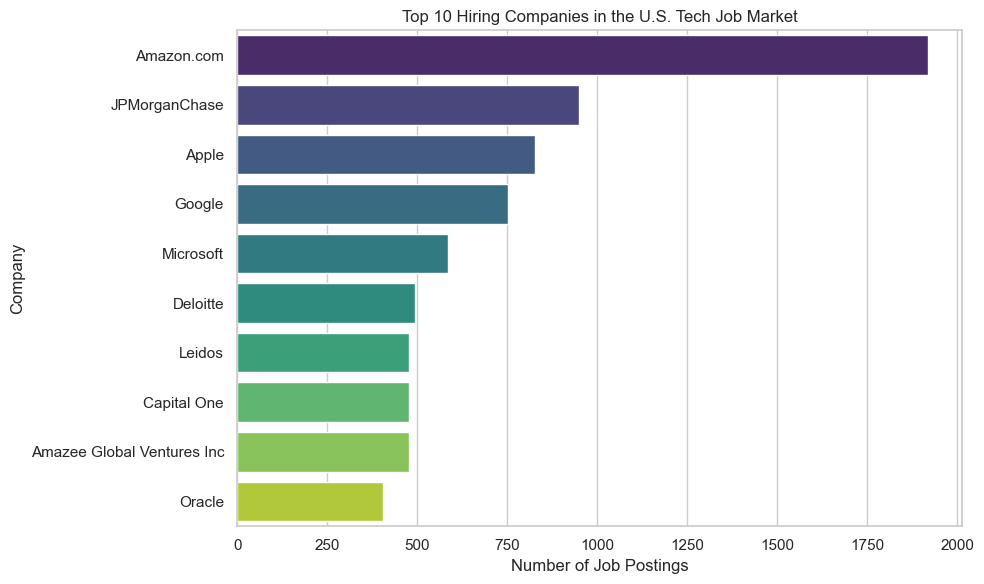

In [10]:
top_companies = df['company'].value_counts().head(10)

print("Top 10 Hiring Companies:")
print(top_companies)

# Visualization

plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')
plt.title("Top 10 Hiring Companies in the U.S. Tech Job Market")
plt.xlabel("Number of Job Postings")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

### Top Job Titles in the U.S. Tech Job Market
The below plot identifies the most frequently posted job titles in tech. 
Common roles include **Software Engineer**, **Data Scientist**, and **Product Manager**, indicating areas of high demand. 

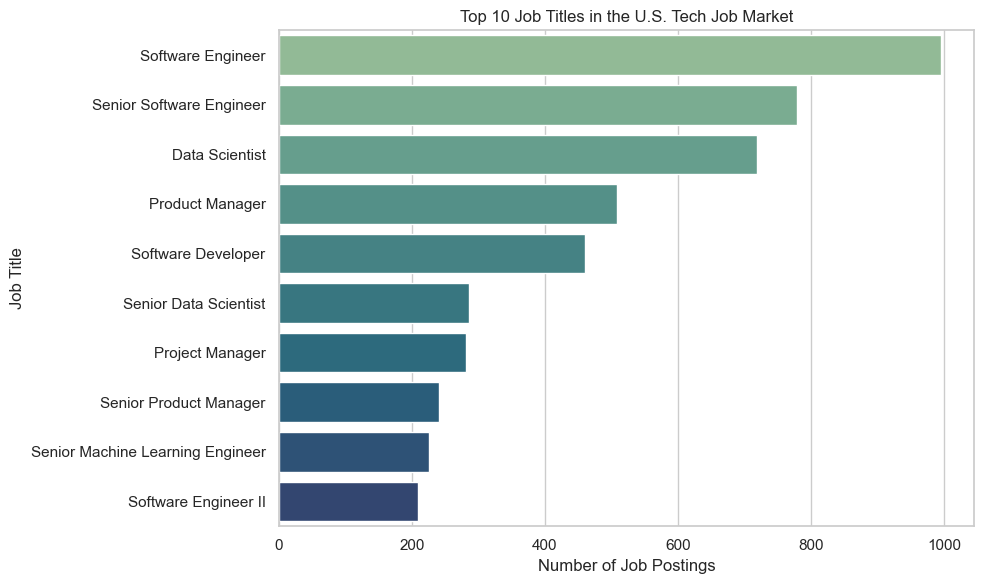

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'all_jobs.xlsx'

top_job_titles = df['title'].value_counts().head(10)

# Visualization

plt.figure(figsize=(10, 6))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='crest')
plt.title('Top 10 Job Titles in the U.S. Tech Job Market')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Title')
plt.tight_layout()

### Top Job Locatins in the U.S. Tech Market
The below chart shows the top 10 locations for tech job postings. 
It includes both major cities and remote roles, with Remote roles leading significantly. 

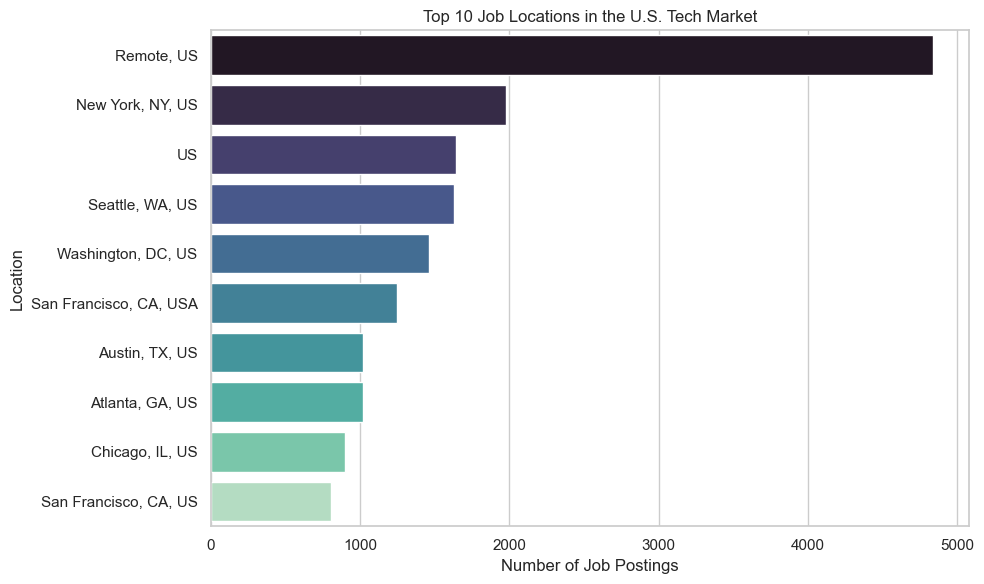

In [16]:
# 3. Identifying the Top U.S. Job Locations. Helps answer where jobs in tech are most concentrated. 

top_locations = df['location'].value_counts().head(10)

# Visualization

plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='mako')
plt.title('Top 10 Job Locations in the U.S. Tech Market')
plt.xlabel('Number of Job Postings')
plt.ylabel('Location')
plt.tight_layout()

### Most Common Job Types in U.S. Tech
The following visualization breaks down the types of job arrangements available in tech postings. **Full-Time** positions dominate, with some opportunities for contract, part-time, and internship roles. 

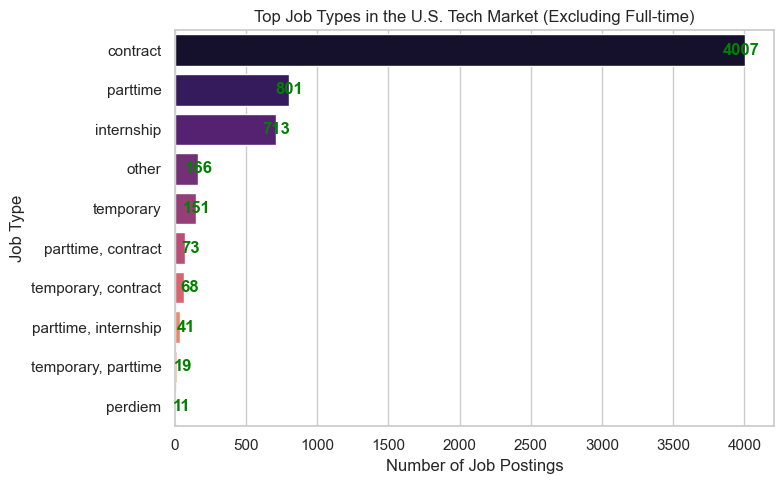

In [36]:
# 4. The following will analyze the most common job types. 

top_job_types = df['job_type'].value_counts()
top_job_types_filtered = top_job_types[~top_job_types.index.str.contains('fulltime', case=False)].head(10)


# Visualization

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=top_job_types_filtered.values, 
            y=top_job_types_filtered.index, 
            palette='magma')

# Labels
for i, v in enumerate(top_job_types_filtered.values):
    ax.text(v + 100, i, str(v), color='green', va='center', ha='right', fontweight='bold')



plt.title('Top Job Types in the U.S. Tech Market (Excluding Full-time)')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Type')
plt.tight_layout()
plt.show()

### Salary Range Distribution
The following plot shows the distribution of minimum and maximum salaries for U.S. tech jobs. 
To improve readability, values above **$500,000** were filtered out as likely outliers.

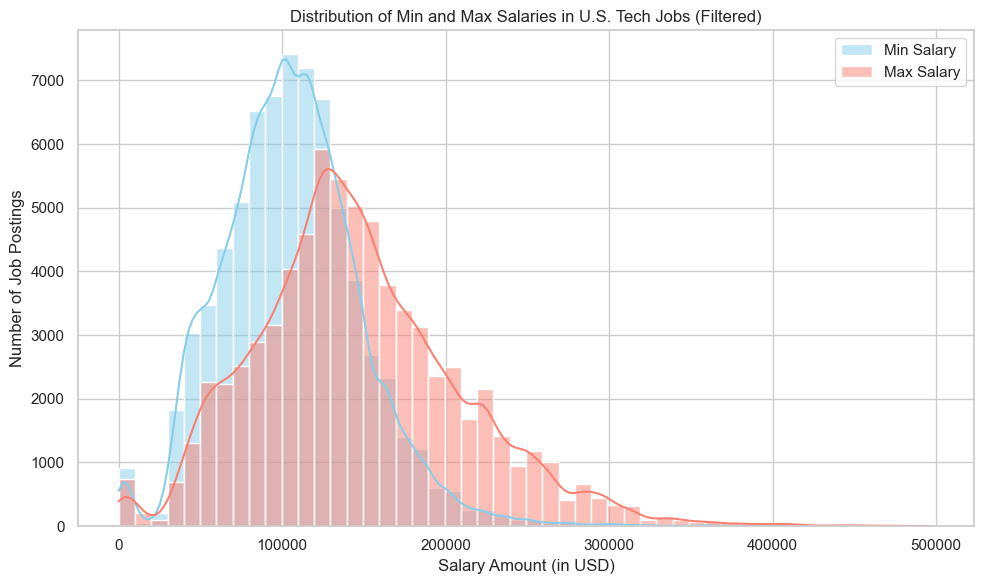

In [26]:
# 5. Salary Range Distribution

# Filter outliers
salary_df_filtered = salary_df[(salary_df['min_amount'] < 500000) & (salary_df['max_amount'] < 500000)]

# Plotting Distributions
plt.figure(figsize=(10, 6))
sns.histplot(salary_df_filtered['min_amount'], kde=True, color='skyblue', label='Min Salary', bins=50)
sns.histplot(salary_df_filtered['max_amount'], kde=True, color='salmon', label='Max Salary', bins=50)

plt.title('Distribution of Min and Max Salaries in U.S. Tech Jobs (Filtered)')
plt.xlabel('Salary Amount (in USD)')
plt.ylabel('Number of Job Postings')
plt.legend()
plt.tight_layout()